In [1]:
#dataset --> https://www.kaggle.com/datasets/hugodarwood/epirecipes 

In [2]:
#bibliotecas necessarias
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
receitas_dataset = pd.read_csv("/content/receitas.csv", sep = ",", encoding = "ISO-8859-1")

In [4]:
receitas_dataset.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
receitas_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [6]:
receitas_dataset.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
receitas_dataset.isnull().sum()

title            0
rating           0
calories      4117
protein       4162
fat           4183
              ... 
cookbooks        0
leftovers        0
snack            0
snack week       0
turkey           0
Length: 680, dtype: int64

In [8]:
#Verificar quantos dados nulos há no campo "Sobremesa"
receitas_dataset['dessert'].isnull().sum()

0

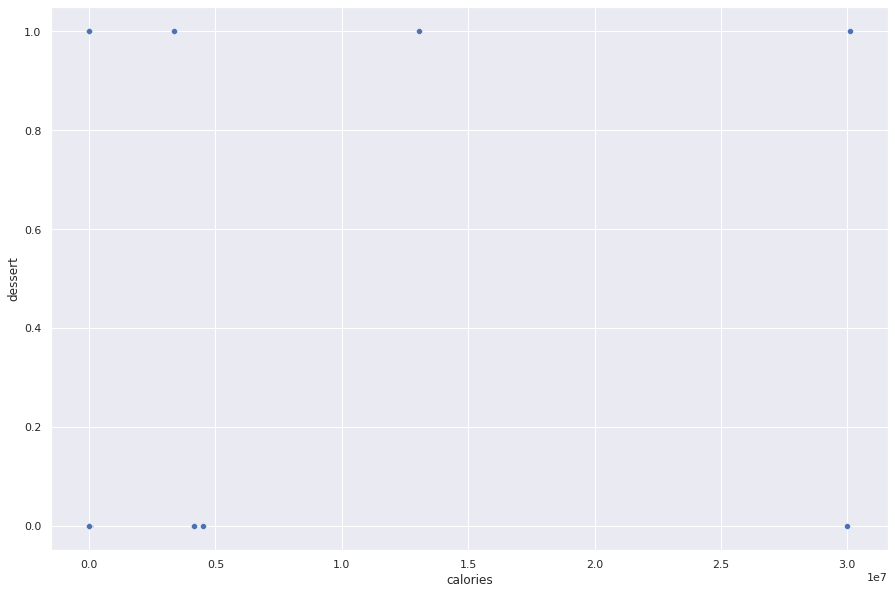

In [9]:
sns.set(style="darkgrid")
g = sns.scatterplot(data=receitas_dataset, x="calories", y="dessert")
g.figure.set_size_inches(15, 10)

In [10]:
#Mantendo apenas receitas com menos de 15.000 calorias
receitas_dataset = receitas_dataset[receitas_dataset['calories'] < 15000].dropna()

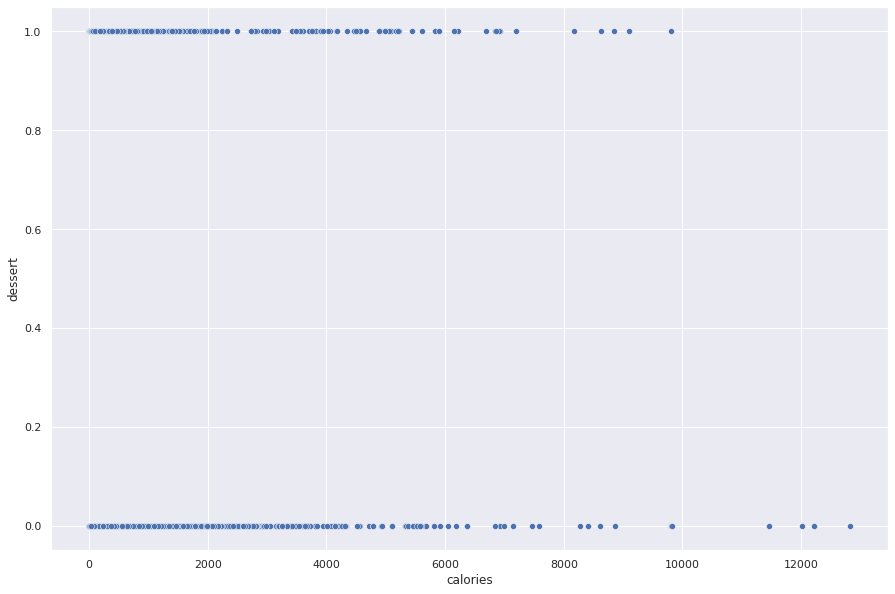

In [11]:
sns.set(style="darkgrid")
g = sns.scatterplot(data=receitas_dataset, x="calories", y="dessert")
g.figure.set_size_inches(15, 10)

In [12]:
receitas_dataset = receitas_dataset.drop(["title"], axis = 1)

In [13]:
#retirando "sobremesa" e mantendo apenas na variavel y 
x = receitas_dataset.drop(["dessert"], axis = 1)
#target --> dessert
y = receitas_dataset.dessert.values


In [14]:
#split de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3)

In [15]:
#criando e treinando a regressao logistica
regressao_logistica = LogisticRegression()
regressao_logistica.fit(x_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [16]:
#teste de predict
previsao = regressao_logistica.predict(x_teste)

In [17]:
#acuracia, precisao e recall
print("Acuracia --> %.2f" % (metrics.accuracy_score(y_teste, previsao)*100))
print("Precisao --> %.2f" % (metrics.precision_score(y_teste, previsao)*100))
print("Recall --> %.2f" % (metrics.recall_score(y_teste, previsao)*100))

Acuracia --> 95.75
Precisao --> 88.66
Recall --> 89.24


Text(0.5, 257.44, 'Previsão')

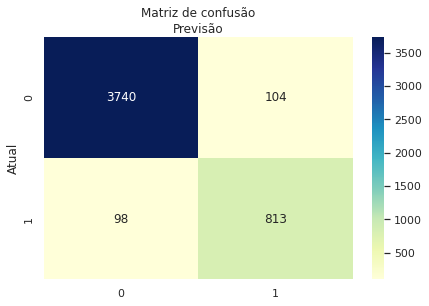

In [18]:
#matriz de confusao
cnf_matrix = metrics.confusion_matrix(y_teste, previsao)
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusão', y=1.1)
plt.ylabel('Atual')
plt.xlabel('Previsão')

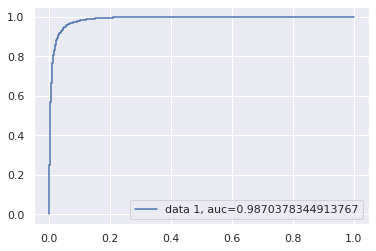

In [19]:
# Curva ROC - Receiver Operating Characteristic 
previsao_proba = regressao_logistica.predict_proba(x_teste)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_teste,  previsao_proba)
auc = metrics.roc_auc_score(y_teste, previsao_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [20]:
print("Coeficientes: ", regressao_logistica.coef_)
print("Intercept:", regressao_logistica.intercept_)

Coeficientes:  [[ 2.91256738e-02  8.10664155e-03 -2.90367796e-01 -5.36278313e-02
  -2.54450792e-03  1.61876008e-02 -2.24266429e-03 -5.33713316e-04
  -1.05794191e-02 -1.48731270e-04 -1.11493355e-02  0.00000000e+00
  -7.06994332e-06 -1.33185035e+00  5.58258426e-01  5.66682325e-02
  -1.37047305e-02  2.36904387e-02  3.30263116e-03 -4.68774160e-06
  -2.00339982e-02 -8.45634822e-01 -2.19416433e-02  4.97436524e-03
   1.40767264e-01 -1.77153704e-03 -3.60478293e-02 -9.72353135e-02
   1.38923968e-03 -6.91863905e-02  0.00000000e+00 -8.66024404e-04
  -5.71940360e-03 -1.31847520e-01  4.79300532e-02 -2.63041432e-01
  -1.18794720e-01  2.10938200e+00  1.15519630e-01 -1.65290767e-02
  -1.96276673e-01 -2.54494356e-03  7.12540875e-04 -1.05400694e-01
  -6.78943775e-02 -1.08294392e-03 -9.83118969e-04 -2.72171527e-03
  -1.61707245e-02 -1.21901288e-01 -2.93141720e-01  5.15100145e-01
   0.00000000e+00  2.38040676e-01 -4.06146527e-03 -1.90146730e-01
   2.18135074e-01 -1.13991030e-01 -1.02308786e-01  1.68601747